# Module 1: Thao tác dữ liệu tín hiệu sinh học

## Bài 1: Khai thác dữ liệu thô từ thiết bị y khoa

### BS. Lê Ngọc Khả Nhi

# Khởi hành

Thân chào các bạn đồng nghiệp, đây là bài thực hành đầu tiên của Module 1 về Thao tác trên dữ liệu tín hiệu sinh học (Biosignal data wrangling). Mục tiêu của module này nhằm chuẩn bị cho các bạn những kỹ năng cơ bản khi làm việc với dữ liệu chuỗi.

Trong các nghiên cứu lâm sàng thông thường, đối tượng của bạn là bệnh nhân, dữ liệu có cấu trúc bảng với mỗi hàng tương ứng với đơn vị quan sát là bệnh nhân, mỗi cột là một biến số, việc nhập liệu thủ công và tải dữ liệu vào máy tính là rất dễ dàng. Trái lại, nghiên cứu tín hiệu sinh học đặt ra một hoàn cảnh hoàn toàn khác, và yêu cầu một công đoạn chuẩn bị dữ liệu phức tạp hơn. 

Đầu tiên, đối tượng của nghiên cứu sẽ gồm 2 cấp độ: cá thể bệnh nhân không còn là đơn vị quan sát, mà chỉ có ý nghĩa như một hộp hay gói dữ liệu (container, pack), chứa bên trong một hay nhiều tập dữ liệu chuỗi tương ứng với những kênh tín hiệu. Những chuỗi dữ liệu này mới là đối tượng chính của phân tích. 

Thứ hai, bạn sẽ không nhập liệu thủ công cho biosignal, nhưng cần hoán chuyển dữ liệu thô xuất ra từ thiết bị (medical device) và cảm biến (sensor) thành array hay dataframe để tiến hành phân tích. Các dữ liệu thô có thể tồn tại dưới nhiều định dạng, cấu trúc khác nhau, thí dụ ASCII (txt), csv, Excel, JSON, DAT, EDF (European Data Format)...; tùy theo cơ sở (viện nghiên cứu, phòng thí nghiệm, bệnh viện, công ty) và nền tảng lưu trữ. Do đó mỗi dự án nghiên cứu và cơ sở lại đặt ra một quy trình xuất,nhập và khai thác dữ liệu riêng, không thể tiếp cận bằng một mô hình tổng quát.

Những bộ dữ liệu public về biosignal trong sách vở phần lớn là thành phẩm của công đoạn data engineering, ta sẽ không học được nhiều về kỹ thuật khi làm việc với chúng. Bài thực hành này đặt các bạn vào một điểm xuất phát xa hơn, cũng là hoàn cảnh phổ biến mà bác sĩ lâm sàng có thể gặp tại bệnh viện: Bạn phải tự mình khai thác dữ liệu thô xuất ra từ phần mềm của một thiết bị xét nghiệm thương mại.


# Thí dụ minh họa

Thí dụ minh họa trong bài, ta sẽ khai thác dữ liệu thô định dạng ASCII xuất từ phần mềm DOMINO của hãng Somnomedics, trong xét nghiệm đa ký giấc ngủ (polysomnography, PSG).

https://somnomedics.de/en/solutions/sleep_diagnostics/diagnostic_software/domino/

PSG được chỉ định cho những bệnh nhân có biểu hiện rối loạn hô hấp trong khi ngủ, nhằm mục tiêu khảo sát chức năng giấc ngủ và chẩn đoán hội chứng ngưng thở khi ngủ do tắc nghẽn (OSAs).

Đây có lẽ là xét nghiệm phức tạp và thú vị nhất trong các kỹ thuật thăm dò chức năng, nó ứng dụng gần như tất cả những loại tín hiệu sinh học, kết hợp lên đến 20-30 kênh tín hiệu khác nhau, ghi nhận bằng nhiều loại cảm biến khác nhau, bao gồm: điện não (EEG), điện cơ mắt (EOG), điện cơ mặt, chi dưới, cơ hoành, (EMG), điện tim (ECG), cử động hô hấp (cảm biến áp lực ngực, bụng - RIP), lưu lượng hô hấp (nasal thermistor, flow pressure), tư thế nằm, cử động hàm dưới(cảm biến gia tốc), nhịp tim, huyết áp, độ bão hòa oxy (SpO2), tiếng ngáy (âm thanh thu qua microphone). Tín hiệu được ghi từ lúc bệnh nhân bắt đầu ngủ cho đến khi thức giấc, kéo dài 4-8h. 

Dữ liệu thô từ xét nghiệm sau đó sẽ được phân tích thủ công bởi kỹ thuật viên, với mục tiêu mô tả cấu trúc của giấc ngủ (trạng thái tỉnh thức, 4 trạng thái N1,N2,N3 và REM), phát hiện các biến cố hô hấp (ngưng/giảm thở do tắc nghẽn/trung ương/hỗn hợp, RERA). Đồng thời các thông số về tim mạch, huyết áp, SpO2 được máy tính phân tích tự động. Dựa vào chuỗi kết quả thủ công, máy tính sẽ ước lượng các chỉ số lâm sàng định lượng, cho phép chẩn đoán các thể bệnh lý khác nhau, thí dụ hội chứng ngưng thở khi ngủ do tắc nghẽn (OSAS) hoặc rối loạn về giấc ngủ khác.

## Gói dữ liệu

Gói dữ liệu thô được chuẩn bị cho 1 bệnh nhân, có thể tải về từ link sau:
https://drive.google.com/file/d/1Md59XrQizIKCJ5G8_mwxbLNaBRN5nMm4/view?usp=sharing

Sau khi tải về và giải nén, bạn sẽ có 1 thư mục Packs, bên trong chứa 1 gói dữ liệu có tên là Respiratory signal Example gồm 24 tập tin dữ liệu thô, 5 tập tin chuỗi label và 1 tập tin Profile chứa thông tin nhân trắc học của bệnh nhân. Tổng kích thước là 560 Mb

## Python package

Trên thực tế, công đoạn khai thác dữ liệu thường được tự động hóa, chuyên biệt, có kế hoạch và hợp lý, đảm bảo tương thích với những công đoạn tiếp theo trong dự án nghiên cứu. Điều này đòi hỏi việc thiết kế các module và package để thực hiện quy trình tải dữ liệu và tái cấu trúc chúng. 

Cho toàn bộ module 1 này, Nhi và các giảng viên khác sẽ không viết code rời rạc trong notebook, nhưng phải chuẩn bị trước tất cả function và class cần thiết trong một package 'module1'; Mỗi notebook thực hành chỉ có tính chất trình diễn. Để xem nội dung source code và thực hành lại, các bạn cần truy nhập vào github của dự án.

Bài thực hành cần dùng package module1, có thể install từ github của dự án:

https://github.com/taile2007/Biosignal-analysis/tree/master/Data%20wrangling-01-Importation

Các bạn đặt module1 trong cùng thư mục hiện hành là có thể dùng được.

# Thông tin về phiên thực hành

In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd
from module1.raw_data_parser import *

In [2]:
from sinfo import sinfo
sinfo()

-----
module1     0.1
numpy       1.19.4
pandas      1.1.5
pytz        2020.1
sinfo       0.3.1
tqdm        4.47.0
-----
IPython             7.16.1
jupyter_client      6.1.6
jupyter_core        4.6.3
jupyterlab          2.1.5
notebook            6.0.3
-----
Python 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.18362-SP0
16 logical CPU cores, Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
-----
Session information updated at 2020-12-23 05:50


# Mục tiêu

Mục tiêu của bài đầu tiên này chỉ có tính chất trình diễn, minh họa trực quan; nhằm giới thiệu một cách tổng quát về một số vấn đề và khái niệm mà các bạn sẽ phải đối diện khi làm việc với dữ liệu chuỗi.

Bài thực hành chưa đặt ra mục tiêu về kỹ năng lập trình, hiện thời các bạn chưa cần quan tâm đến nội dung code các methods, function được sử dụng, mà chỉ cần hiểu ý nghĩa các khái niệm, vấn đề (Bạn có thể đọc source code trong module1, yêu cầu kiến thức lập trình Python trung bình trở lên). Nhi sẽ bàn về những chi tiết kỹ thuật trong các bài tiếp theo.


# Khảo sát cấu trúc gói dữ liệu

## Lợi ích của bảng tóm tắt cấu trúc gói dữ liệu


Trước khi khai thác gói dữ liệu, bạn cần xây dựng một bảng tóm tắt các thông tin về dữ liệu. Bảng này có nhiều lợi ích như

1) Mang lại một cái nhìn toàn cảnh, nắm được thông tin tổng quát về cấu trúc của data folder và các files bên trong, biết số lượng bệnh nhân, bao nhiêu data files, có bị thiếu sót gì không ? 

2) Ước lượng được kích thước file, số file, để tối ưu hóa không gian lưu trữ/bộ nhớ cho việc tải dữ liệu, có kế hoạch sử dụng multithread/multiprocessing khi viết code. Thí dụ minh họa này chỉ có 1 data pack, tương ứng với gói dữ liệu của 1 bệnh nhân, nhưng trên thực tế database có thể lớn hơn rất nhiều với hàng chục hay hàng trăm bệnh nhân.

3) Có thể được sử dụng như một bản đồ để truy nhập vào bất cứ file dữ liệu nào.

Phần lớn các method data wrangling sẽ dễ dàng hơn nếu ta sử dụng pandas, do đó Nhi thiết kế methods dựa trên các nền tảng là pandas DataFrames và pandas Series. Bảng thông tin tóm tắt cũng có hình thức 1 dataframe. 

Đầu tiên, ta định vị thư mục Packs bằng đường dẫn: 

In [3]:
PACK_FOLDER = 'D:\Project\Packs'

Nhi khởi tạo 1 instance pack của Class Paths_Info_Summary với path PACK_FOLDER

In [4]:
pack = Paths_Info_Summary(PACK_FOLDER)

1 attribute của class này là path đến data founder:

In [5]:
pack.data_folder

'D:\\Project\\Packs'

static method print_directory_tree cho phép vẽ cây thư mục để xem cấu trúc của folder Packs

In [6]:
pack.print_directory_tree(pack.data_folder)

|__Packs/
   |__Respiratory signal Example/
        |__Profile.txt
      |__Raw data/
            |__Abd RIP.txt
            |__Avg AP.txt
            |__Dia AP.txt
            |__ECG.txt
            |__EMG1.txt
            |__EMG2.txt
            |__EMG3.txt
            |__EMG4.txt
            |__EMG5.txt
            |__EMG6.txt
            |__Flow Pressure.txt
            |__Flow Th.txt
            |__HMM.txt
            |__Microphone.txt
            |__OESP.txt
            |__Pleth Flowrate.txt
            |__PLMl.txt
            |__PLMr.txt
            |__Pulse.txt
            |__Snoring P.txt
            |__SpO2.txt
            |__Sys AP.txt
            |__Tx RIP.txt
            |__VMM.txt
      |__Scoring sequences/
            |__Desaturations.txt
            |__Hypnogramme.txt
            |__Micro Arousals.txt
            |__Respiratory events.txt
            |__SpO2.txt


Method chính trong class này có công dụng tạo ra 1 dataframe tóm tắt thông tin về các file bên trong gói dữ liệu, Nhi gán dataframe này cho 1 object tên là  pinfo

In [7]:
pinfo = pack.create_signal_summary()

pinfo.head()

,full_paths,pack,filename,signal_type,Size (Mb)
0,D:\Project\Packs\Respiratory signal Example\Ra...,Respiratory signal Example,Abd RIP.txt,abd rip,3.304411
1,D:\Project\Packs\Respiratory signal Example\Ra...,Respiratory signal Example,Avg AP.txt,avg ap,4.410931
2,D:\Project\Packs\Respiratory signal Example\Ra...,Respiratory signal Example,Dia AP.txt,dia ap,4.401841
3,D:\Project\Packs\Respiratory signal Example\Ra...,Respiratory signal Example,ECG.txt,ecg,67.016486
4,D:\Project\Packs\Respiratory signal Example\Ra...,Respiratory signal Example,EMG1.txt,emg1,48.448591


Dataframe này, ngoài chức năng mô tả thông tin cấu trúc, còn có vai trò như 1 bản đồ để khai thác dữ liệu.

Cột full_paths chứa đường dẫn đến từng file, có thể dùng như 1 địa chỉ cho phép ta truy nhập vào mỗi file dữ liệu.

Cột pack cho biết tên của pack dữ liệu. Khi có nhiều bệnh nhân, ta sẽ có nhiều pack, nên cột này cho phép ta lọc 1 hay nhiều bệnh nhân cần khai thác dữ liệu.

Cột filename cho biết tên file, tương ứng 24 kênh tín hiệu thô, và 5 chuỗi label scoring (kết quả đa ký giấc ngủ).

Cột signal_type có chức năng như 1 danh sách những tên viết tắt của kênh tín hiệu; bao gồm EEG, ECG, EOG, EMG chi và cơ hô hấp, các tín hiệu surrogate cử động hô hấp, Pulse oximetry (SpO2), Pulse, huyết áp, mạch, tiếng ngáy thu qua microphone, áp lực thực quản. vv

Có 30 loại dữ liệu khác nhau trong pack này:

In [11]:
len(pinfo.signal_type.unique())

30

In [8]:
print(pinfo.signal_type.values)

['abd rip' 'avg ap' 'dia ap' 'ecg' 'emg1' 'emg2' 'emg3' 'emg4' 'emg5'
 'emg6' 'flow pressure' 'flow th' 'hmm' 'microphone' 'oesp'
 'pleth flowrate' 'plml' 'plmr' 'pulse' 'snoring p' 'spo2' 'sys ap'
 'tx rip' 'vmm' 'evt_spo2' 'hypno' 'ma' 'respi_evt' 'raw_spo2' 'profile']


Cột Size cho biết kích thước mỗi file, tính bằng Mb; như ta thấy, các file tín hiệu thô (txt) có kích thước khá lớn, trung bình là 19.6 Mb, và có thể lên đến 67 Mb (vì ta ghi tín hiệu trong suốt đêm, độ dài từ 6-7h ở tần số 32 Hz hoặc 256 Hz). Thử tưởng tượng 1 nghiên cứu khoảng 100 bệnh nhân, chỉ 1 kênh tín hiệu cũng có thể sinh ra tổng kích thước lên đến vài chục Gb. Đây là một thí dụ điển hình của Big data.

In [10]:
pinfo["Size (Mb)"].describe()

count    30.000000
mean     19.659278
std      21.366643
min       0.000046
25%       3.433248
50%       6.575642
75%      46.410888
max      67.016486
Name: Size (Mb), dtype: float64

#  DataImporter class

Tiếp theo, Nhi dùng Class DataImporter để tạo ra 1 object data parser. Trong object này có những method cho phép tải các loại tín hiệu khác nhau, hoán chuyển và tái chọn mẫu...

Ý nghĩa công việc này chính là tải dữ liệu thô vào Python và chuyển sang định dạng pandas Series hay DataFrame. 

Tại sao không là numpy array ? Vì ta không chỉ quan tâm đến bản thân nội dung chuỗi dữ liệu, nhưng còn cần thông tin về thời điểm và thước đo thời gian chính xác; hệ thống datetime index của pandas thỏa mãn yêu cầu này.

Tại sao dùng OOP (Class) ? Vì OOP cho phép hình dung về mỗi instance như một thực thể riêng biệt nhưng cùng thuộc về nhân tố Bệnh nhân trong thí nghiệm khoa học, và trên mỗi pack data sẽ quy định 1 số method chuyên biệt cho từng công đoạn, hiện thời là công đoạn tải dữ liệu. Ta có thể lưu các dữ liệu này như attribute của class datapack/bệnh nhân; để cuối cùng có thể sao lưu toàn bộ gói dữ liệu/hồ sơ bệnh nhân bằng pickle.

Thí dụ, ta tạo ra 1 instance case từ class DataImporter, đại diện cho bệnh nhân Respiratory signal Example

In [17]:
case = DataImporter(signal_summary = pinfo, 
                    data_path = PACK_FOLDER,
                    pack_folder= 'Respiratory signal Example')

case

Đây là data paser cho pack dữ liệu Respiratory signal Example

Method Import_pack_profile sẽ trích xuất thông tin nhân trắc của bệnh nhân, và lưu thành 1 dictionary:

In [49]:
help(case.Import_pack_profile)

Help on method Import_pack_profile in module module1.raw_data_parser:

Import_pack_profile() method of module1.raw_data_parser.DataImporter instance
    Hàm truy xuất thông tin bệnh nhân:
    Đọc file Profile.txt và tạo ra 1 dict gồm Giới tính, chiều cao, 
    cân nặng, BMI cho bệnh nhân.



In [48]:
patient_info = case.Import_pack_profile()

patient_info

{'Giới tính': 'F', 'Tuổi': 36.32, 'Chiều cao': 176.0, 'Cân nặng': 84.0}

# Nhập môn dữ liệu chuỗi

Trong bài này, Nhi sẽ giới thiệu về 3 loại dữ liệu thường gặp trong bài toán phân tích dữ liệu chuỗi:

## Loại 1: Dữ liệu chuỗi định lượng, liên tục

Gồm tất cả file chứa trong thư mục Raw data, mỗi file là 1 kênh tín hiệu. Loại dữ liệu này là một chuỗi các con số (float hay interger), tương ứng với giá trị của tín hiệu lấy mẫu tại các thời điểm tiếp nối nhau với 1 chu kì (tần số) lấy mẫu hằng định trong suốt thời gian thí nghiệm, từ lúc bắt đầu đến khi kết thúc.

Nếu bạn mở 1 file ASCII txt raw data, sẽ thấy nội dung như sau:

In [ ]:
'''
Signal Type: ADC
Start Time: 30/09/2017 22:52:18
Sample Rate: 32
Length: 858432
Unit: mmHg
Data:

-99,3
-100,1
-98,5
-99,4
...
-99,8
-99,0
-99,9
-98,5
'''

Như vậy, 1 file raw data có 2 phần, header và Data; 

phần header chứa các thông tin kỹ thuật quan trọng, gồm: thời điểm bắt đầu xét nghiệm, tần số lấy mẫu, độ dài của data, và đơn vị đo. 

Phần Data chứa chuỗi dữ liệu số ta cần khai thác, nó được định vị từ sau string Data:, tiếp theo mỗi hàng là 1 giá trị tại 1 thời điểm, tập hợp thành 1 chuỗi các con số.

Method import_raw_data cho phép tải dữ liệu loại này: các bạn có thể dùng function help để xem hướng dẫn sử dụng method này:

In [16]:
help(case.import_raw_data)

Help on method import_raw_data in module module1.raw_data_parser:

import_raw_data(signal_type: str, n_lines=None, samp_freq=None) method of module1.raw_data_parser.DataImporter instance
    Hàm cho phép tải bất kì dữ liệu nào thuộc loại 1 (raw data), 
    áp dụng tổng quát cho tất cả raw data
    
    :signal_type: tên viết tắt của loại dữ liệu, chú ý: luôn là chữ thường
    :n_lines: số nguyên, giới hạn số hàng cần tải, thấp nhất là 5;
    
    Ghi chú: 
    1) Nếu n_lines = None, hàm sẽ xuất ra 3 kết quả:
    :return 1: df_data, tín hiệu gốc, 
               pd.Series liên tục, có datetime index
    :return 2: df_resampled, tín hiệu tái chọn mẫu; 
               pd.Series liên tục, có datetime index
    :return 3: fs, giá trị tần số lấy mẫu gốc, int
    
    2) Nếu n_lines = 5, hàm chỉ xuất ra 2 kết quả:
    :return 1: pd.Series gồm 2 hàng: thới điểm bắt đầu và kết thúc xét nghiệm
    :return 2: fs: giá trị tần số lấy mẫu gốc, int
    
    3) Nếu không tìm thấy đường dẫn của loại tí

Trước hết, ta tra bảng (dataframe pinfo) để chọn tên của loại tín hiệu cần tải, nếu dùng không đúng tên, hàm sẽ thông báo không tìm thấy file.

In [18]:
sample_df, resampled_df, fs = case.import_raw_data(signal_type='some strange type', 
                                                   samp_freq=None)

Không tìm thấy data cho tín hiệu  some strange type ở bệnh nhân này !


Nếu chỉ tải dữ liệu gốc, không tái chọn mẫu, ta đặt argument samp_freq=None.
    
Thí dụ, tải tín hiệu lưu lượng thông khí ở mũi ghi bằng cảm biến nhiệt lượng (nasal flow thermistor)

In [19]:
sample_df, resampled_df, fs = case.import_raw_data(signal_type='flow th', 
                                                   samp_freq=None)

fs chứa giá trị tần số lấy mẫu = 32 Hz

In [21]:
fs

32

Chuỗi dữ liệu được ghi vào object sample_df, có dạng 1 pd.Series:

In [20]:
sample_df

2017-09-30 22:52:18+02:00           133.0
2017-09-30 22:52:18.031250+02:00    114.0
2017-09-30 22:52:18.062500+02:00     96.0
2017-09-30 22:52:18.093750+02:00     71.0
2017-09-30 22:52:18.125000+02:00     48.0
                                    ...  
2017-10-01 06:19:23.843750+02:00    -79.0
2017-10-01 06:19:23.875000+02:00    -97.0
2017-10-01 06:19:23.906250+02:00   -113.0
2017-10-01 06:19:23.937500+02:00   -127.0
2017-10-01 06:19:23.968750+02:00   -137.0
Name: flow th, Length: 858432, dtype: float64

Đây là 1 dữ liệu chuỗi điển hình mà các bạn sẽ gặp khi phân tích tín hiệu. 

Nội dung dữ liệu gồm có 2 phần: 

Phần chính - array 1D chứa chuỗi giá trị amplitude của tín hiệu; 

phần thứ 2 là timestamps hay time index, có chức năng như một thước đo thời gian, biểu thị thời điểm chính xác: ngày, tháng, năm, giờ, phút, giây và mili giây (thí dụ: 2017-09-30 22:52:18.031250), cùng hiệu chỉnh múi giờ Châu Âu Paris (+02:00), ở từng lượt lấy mẫu. 

Như bạn thấy, trong file dữ liệu gốc không có time index này, tuy nhiên, nó lại cung cấp 2 chìa khóa quan trọng cho phép xây dựng timestamp, đó là thời điểm bắt đầu ghi tín hiệu, và tần số lấy mẫu (chìa khóa thứ 3 là độ dài chuỗi).

Mặc dù bản thân chuỗi giá trị là đối tượng cần phân tích, time index cực kì quan trọng khi bạn muốn đồng bộ hóa giữa chuỗi dữ liệu và chuỗi biến cố, hoặc tái chọn mẫu.

Khi áp dụng datetime index và timezone đúng, dữ liệu pandas.Series sẽ đo thời gian chính xác và tương đương như đồng hồ trong vi xử lý của thiết bị xét nghiệm, giờ địa phương ở địa điểm xét nghiệm, máy tính đã dùng để xuất dữ liệu, và máy tính của bất cứ đồng nghiệp nào khác chạy code của bạn.

Ta lưu ý đến giá trị Length: 858432, nó cho biết kích thước chuỗi dữ liệu, hay thời gian lấy mẫu. Từ tần số lấy mẫu và kích thước, ta có thể tính ra thời gian ngủ của bệnh nhân là 447,1 phút:

In [15]:
858432*(1/32)/60

447.1

Tất cả tín hiệu digital thực chất được lấy mẫu rời rạc, nhưng hệ thống datetime index trong pandas cho phép ta xử lý chúng như chuỗi liên tục, thí dụ ta có thể tái chọn mẫu ở 1 tần số khác, trích xuất 1 đoạn tín hiệu có độ dài tính bằng đơn vị thời gian bất kì, đồng bộ 2 chuỗi chính xác đến 1 phần triệu giây. 

Thí dụ, ta sẽ thử tái chọn mẫu bằng cách giảm tần số từ 32 Hz xuống còn 16 Hz:

In [18]:
sample_df, resampled_df, fs = case.import_raw_data(signal_type='flow th', 
                                                   samp_freq=16)

Lúc này, ngoài dữ liệu gốc trong sample_df, ta có thêm dữ liệu tái chọn mẫu; 

In [19]:
resampled_df

2017-09-30 22:52:18+02:00           133.0
2017-09-30 22:52:18.062500+02:00     96.0
2017-09-30 22:52:18.125000+02:00     48.0
2017-09-30 22:52:18.187500+02:00      2.0
2017-09-30 22:52:18.250000+02:00    -43.0
                                    ...  
2017-10-01 06:19:23.687500+02:00     13.0
2017-10-01 06:19:23.750000+02:00    -27.0
2017-10-01 06:19:23.812500+02:00    -65.0
2017-10-01 06:19:23.875000+02:00    -97.0
2017-10-01 06:19:23.937500+02:00   -127.0
Freq: 62500U, Name: flow th, Length: 429216, dtype: float64

Độ dài của chuổi 16 Hz đúng bằng 1 nửa của chuỗi 32 Hz

In [21]:
sample_df.shape[0] / resampled_df.shape[0]

2.0

Khi quan sát 2 phút đầu tiên của chuỗi tín hiệu, ta lại thấy rằng thông tin của chuỗi 16 Hz không mất gì so với chuỗi 32 Hz, nhưng kích thước chỉ còn 1 nửa; gợi ý rằng dù tín hiệu gốc được lấy mẫu ở tần số cao, ta có thể phân tích nó ở tần số thấp hơn.

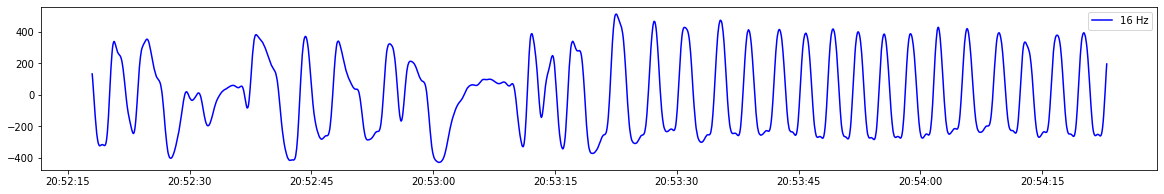

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.plot(resampled_df[0:2000], 'b-', label = '16 Hz')
plt.legend()

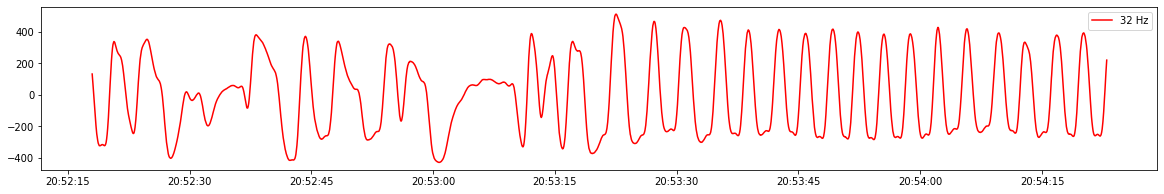

In [47]:
plt.figure(figsize=(20,3))
plt.plot(sample_df[0:4000], 'r-', label = '32 Hz')
plt.legend()

### Loại 2A: Dữ liệu chuỗi định tính liên tục

Thí dụ điển hình cho loại dữ liệu này, đó là chuỗi trạng thái giấc ngủ hay hypnogram. Dữ liệu này được tạo ra theo cơ chế như sau: kỹ thuật viên sẽ đọc tín hiệu EEG, EOG, EMG theo từng trang (cửa sổ) có độ dài tiêu chuẩn là 30 giây, và dán 1 trong 5 nhãn : Wake, N1, N2, N3, REM. Như vậy, kết quả tạo ra 1 chuỗi các nhãn với chu kì 30 giây.

Chuỗi dữ liệu định tính được dùng như Outcome hay Target trong bài toán Machine learning classification, nó cũng cho phép khảo sát sự chuyển tiếp giữa các biến cố thông qua mô hình Markov ẩn (HMM) và ước tính các thông số lâm sàng khác.

Method import_adjacent_window_evt cho phép tải chuỗi dữ liệu loại này:

Dù bản chất của chuỗi label là rời rạc, nhưng method này cho phép tái tạo lại datetime index một cách liên tục, và tự động điền khuyết giá trị label vào những thời điểm trung chuyển; hơn nữa, nó còn cho phép tái chọn mẫu với tần số bất kì, nhằm đồng bộ hóa với những chuỗi tính hiệu định lượng liên tục. Khả năng này rất quan trọng khi thực hiện các bài toán machine learning classification trên dữ liệu biosignal.

Dữ liệu thô có cấu trúc như sau:

In [ ]:
'''
Signal ID: Hypno
Start Time: 30-09-17 23:00:00
Unit: 
Signal Type: Discrete
Events list: N4,N3,N2,N1,REM,Wake,Mvt
Rate: 30 s

23:00:00,000; Wake
23:00:30,000; Wake
23:01:00,000; Wake
...
23:18:30,000; Wake
23:19:00,000; Wake
23:19:30,000; Wake
23:20:00,000; N1
23:20:30,000; N2
23:21:00,000; N2
...
'''

In [51]:
help(case.import_adjacent_window_evt)

Help on method import_adjacent_window_evt in module module1.raw_data_parser:

import_adjacent_window_evt(signal_type='hypno', samp_freq=None, reshape=True) method of module1.raw_data_parser.DataImporter instance
    Hàm tải dữ liệu chuỗi biến cố liên tục (loại 2A), thí dụ hypno; 
    hỗ trợ tái chọn mẫu và hoán chuyển ngược về loại 2B (danh sách biến cố không liên tục)
    
    :signal_type: tên viết tắt loại dữ liệu, Lưu ý: hàm này chỉ dùng cho 'hypno' hoặc 'spo2'
    :reshape = True có nghĩa là sẽ hoán chuyển 2A thành 2B, và xuất ra cả 2; 
    : reshape = False có nghĩa là không cần hoán chuyển, chỉ xuất ra dữ liệu chuỗi liên tục 2A
    :return 1: df_data: 1 pd.Series chứa dữ liệu chuỗi liên tục (gốc), có datetime index
    :return 2: df_resampled: 1 pd.Series chứa dữ liệu chuỗi liên tục (đã được tái chọn mẫu), có datetime index
    :return 3: dict_map: dictionary cho biết ý nghĩa các nhãn biến cố
    :return 4: df_event: chỉ khi reshape = True, dataframe danh sách biến cố không liên

Thí dụ ta tải chuỗi label hypnogram, và tăng tần số lấy mẫu lên 16 Hz để đồng bộ hóa với 1 chuỗi tín hiệu 16 Hz khác

In [54]:
df_data, df_resampled, dict_map, window_len = \
case.import_adjacent_window_evt(signal_type='hypno', 
                                samp_freq = 16, 
                                reshape = False)

df_data chứa chuỗi label gốc, chưa tái chọn mẫu. Nó có độ dài là 873 cửa sổ phân đoạn (epoches),tức là khoảng 436,5 phút. Giá trị này thấp hơn tổng thời gian của chuỗi tín hiệu thực là 447 phút, có thể do kỹ thuật viên đã bỏ không dán label cho 11 phút sau cùng, khi bệnh nhân đã thức giấc.

In [56]:
df_data

2017-09-30 23:00:00+02:00    0
2017-09-30 23:00:30+02:00    0
2017-09-30 23:01:00+02:00    0
2017-09-30 23:01:30+02:00    0
2017-09-30 23:02:00+02:00    0
                            ..
2017-10-01 06:14:00+02:00    2
2017-10-01 06:14:30+02:00    2
2017-10-01 06:15:00+02:00    2
2017-10-01 06:15:30+02:00    0
2017-10-01 06:16:00+02:00    0
Name: hypno, Length: 873, dtype: int64

In [57]:
873*30/60

436.5

Method đã gán 1 giá trị interger cho các trạng thái giấc ngủ, quy tắc mã hóa nằm trong dict_map:

In [59]:
dict_map

{'Wake': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'REM': 4, 'N4': -1, 'Mvt': -1}

Độ dài của epoch được trích xuất tự động, đúng bằng 30s

In [60]:
window_len

30.0

df_resampled chứa chuỗi label đã được tái chọn mẫu ở tần số 16 Hz, nếu ta tính độ dài sẽ thấy xấp xỉ 436 phút

In [61]:
df_resampled

2017-09-30 23:00:00+02:00           0
2017-09-30 23:00:00.062500+02:00    0
2017-09-30 23:00:00.125000+02:00    0
2017-09-30 23:00:00.187500+02:00    0
2017-09-30 23:00:00.250000+02:00    0
                                   ..
2017-10-01 06:15:59.750000+02:00    0
2017-10-01 06:15:59.812500+02:00    0
2017-10-01 06:15:59.875000+02:00    0
2017-10-01 06:15:59.937500+02:00    0
2017-10-01 06:16:00+02:00           0
Freq: 62500U, Name: hypno, Length: 418561, dtype: int64

In [64]:
418561*(1/16)/60

436.00104166666665

Trong cả 2 chuỗi df_resampled và df_data, hệ thống datetime index biểu thị một thước đo thời gian liên tục và chính xác đến 1 phần triệu giây.

### Loại 2B: Danh sách biến cố

Loại dữ liệu định tính thứ hai mà ta có thể gặp, đó là danh sách biến cố. Khác với loại 2A, loại 2B không phải là chuỗi liên tục, nhưng là danh sách của tất cả các biến cố, được định vị bằng 2 mốc thời gian bắt đầu và kết thúc. Các biến cố này được sắp xếp theo trình tự thời gian. 

Thí dụ: data desaturations (biến cố mất bão hòa Oxy máu, SpO2 giảm hơn 30% so với mức cơ bản), Micro arousals (biến cố vi thức), Respir. events (biến cố rối loạn hô hấp).

Method import_irregular_window_evt cho phép tải, tái chọn mẫu dữ liệu loại này:

Dữ liệu thô có cấu trúc như sau:

In [ ]:
'''
Signal ID: PSG_scoring
Start Time: 30-09-17 23:00:00
Unit: s
Signal Type: Scoring

23:20:53,919-23:21:04,718; 11;CH
23:22:36,417-23:23:03,798; 27;OH
23:23:20,564-23:23:30,088; 10;CH
23:25:38,441-23:26:07,409; 29;RERA
'''

In [65]:
help(case.import_irregular_window_evt)

Help on method import_irregular_window_evt in module module1.raw_data_parser:

import_irregular_window_evt(signal_type: str, samp_freq=None, get_true_stop_time=False) method of module1.raw_data_parser.DataImporter instance
    Hàm cho phép tải dữ liệu chuỗi biến cố thuộc loại 2B : không liên tục;
    hỗ trợ tái chọn mẫu với tần số tùy chọn
    
    :signal_type: tên viết tắt của loại dữ liệu, thí dụ 'respi_evt', 'ma' hoặc 'evt_spo2'
    :samp_freq: tần số lấy mẫu hoặc datetime array dùng để tái chọn mẫu
    :get_true_stop_time: Đồng bộ hóa với 1 raw data, 
    giá trị mặc định là False, khi đó chỉ sử dụng timestamps từ chuỗi biến cố,
    nếu True, sẽ dùng timestamps của tín hiệu thô tương ứng, 
    thí dụ respi_evt sẽ dùng Nasal flow Thermistor, desaturation sẽ dùng SpO2, ...
    Cách làm này cho phép tối ưu hóa về đồng bộ giữa chuỗi biến cố và tín hiệu thô.
    
    :return 1: 1 dataframe (chuỗi loại 2B) có cấu trúc mỗi hàng là 1 biến cố, 
    và 4 cột:'evt_start, 'evt_stop', 'evt_inf

Thí dụ ta tải danh sách biến cố hô hấp (respi_evt) và đồng bộ hóa với tín hiệu nasal flow thermistor ở tần số 16 Hz

In [67]:
resp_data, resp_resampled, resp_map, \
start_datetime, stop_datetime = \
case.import_irregular_window_evt(signal_type = 'respi_evt',
                                 samp_freq=16,
                                 get_true_stop_time=True)

object resp_data chứa nội dung danh sách được trích ra từ dữ liệu thô:

In [68]:
resp_data

,evt_start,evt_stop,evt_info,evt_value
0,2017-09-30 23:20:53.919000+02:00,2017-09-30 23:21:04.718000+02:00,11,4
1,2017-09-30 23:22:36.417000+02:00,2017-09-30 23:23:03.798000+02:00,27,3
2,2017-09-30 23:23:20.564000+02:00,2017-09-30 23:23:30.088000+02:00,10,4
3,2017-09-30 23:25:38.441000+02:00,2017-09-30 23:26:07.409000+02:00,29,2
4,2017-09-30 23:26:12.072000+02:00,2017-09-30 23:26:56.715000+02:00,45,2
...,...,...,...,...
81,2017-10-01 05:43:48.937000+02:00,2017-10-01 05:46:37.985000+02:00,169,1
82,2017-10-01 05:46:38.381000+02:00,2017-10-01 05:46:55.048000+02:00,17,3
83,2017-10-01 05:47:17.270000+02:00,2017-10-01 06:06:20.921000+02:00,1144,2
84,2017-10-01 06:06:28.362000+02:00,2017-10-01 06:06:40.266000+02:00,12,4


đây là 1 dataframe có cấu trúc: mỗi hàng là 1 biến cố, 4 cột: 

evt_start/stop = thời điểm bắt đầu, thời điểm kết thúc;

evt_info: độ dài của biến cố, tính bằng giây,

evt_value: Nhãn của biến cố, quy định trong dictionary

Giá trị của evt_start và evt_stop là những datetime object trong pandas, với độ chính xác đến 1 phần triệu giây, nó có thể dùng như index để trích xuất dữ liệu từ những chuỗi tín hiệu khác.

Danh sách này có rất nhiều công dụng, thí dụ, nó có thể dùng để đinh vị và dán nhãn cho các phân đoạn tín hiệu trong bài toán Classification; làm các thống kê về tần suất các biến cố; hoặc về độ dài trung bình của mỗi loại biến cố:

In [109]:
from collections import Counter

Counter(resp_data.evt_value)

Counter({4: 42, 3: 10, 2: 21, 1: 6, 6: 5, 5: 2})

In [111]:
resp_data.groupby('evt_value').describe()['evt_info']

,count,mean,std,min,25%,50%,75%,max
evt_value,,,,,,,,
1,6.0,102.166667,68.476030,36.0,54.0,77.0,148.75,204.0
2,21.0,412.142857,340.997403,29.0,145.0,342.0,514.00,1144.0
3,10.0,24.300000,11.804425,15.0,17.5,21.5,24.75,56.0
4,42.0,13.642857,2.911888,10.0,11.0,13.0,16.00,22.0
5,2.0,15.000000,7.071068,10.0,12.5,15.0,17.50,20.0
6,5.0,11.200000,2.167948,10.0,10.0,10.0,11.00,15.0


In [69]:
resp_map

{'FL': 1, 'RERA': 2, 'OH': 3, 'CH': 4, 'OA': 5, 'CA': 6}

Ta cũng lấy thông tin về thời điểm bắt đầu và kết thúc

In [82]:
print(start_datetime)
print(stop_datetime)

2017-09-30 23:00:00+02:00
2017-10-01 06:19:24+02:00


Tính năng tái chọn mẫu cho phép hoán chuyển danh sách biến cố thành định dạng 2A, tức chuỗi định tính liên tục, ở tần số tùy chọn (16Hz). Đây là 1 dataframe có datetime index và cột value ghi label.

Định dạng chuỗi liên tục này cho phép đồng bộ hóa và phân đoạn trực tiếp với bất cứ chuỗi tín hiệu nào, vì chúng có cùng hệ thống datetime index (dù có thể sai biệt vài mili giây).

In [94]:
resp_resampled

,value
2017-09-30 23:00:00+02:00,0
2017-09-30 23:00:00.062500+02:00,0
2017-09-30 23:00:00.125000+02:00,0
2017-09-30 23:00:00.187500+02:00,0
2017-09-30 23:00:00.250000+02:00,0
...,...
2017-10-01 06:15:30.562500+02:00,2
2017-10-01 06:15:30.625000+02:00,2
2017-10-01 06:15:30.687500+02:00,2
2017-10-01 06:15:30.750000+02:00,2


Độ dài chuỗi label 16 Hz này khoảng 435.5 phút

In [95]:
resp_resampled.shape[0]*(1/16)/60

435.51458333333335

### Hoán chuyển chuỗi định tính thành danh sách biến cố 

Ta thấy mỗi định dạng 2A, 2B có những ích lợi và ứng dụng riêng. Do đó, có thể bạn sẽ muốn chuyển đổi định dạng 2A (chuỗi liên tục) về định dạng 2B (danh sách biến cố). Method adjacent_to_irregular cho phép làm việc này:

In [41]:
help(case.adjacent_to_irregular)

Help on function adjacent_to_irregular in module module1.raw_data_parser:

adjacent_to_irregular(df_resampled: pandas.core.series.Series, samp_freq: int)
    Hàm chuyển đổi từ loại dữ liệu chuỗi 2A (sau tái chọn mẫu), sang loại dữ liệu chuỗi 2B
    Chỉ áp dụng cho chuỗi kết quả Hypnogram
    : df_resample: pandas Series, có nội dung là 1 chuỗi liên tục các label, có datetime index,
    : samp_freq: tần số lấy mẫu, 1 số nguyên, thí dụ 10, 30
    : return: 1 dataframe có cấu trúc: mỗi hàng là 1 biến cố,
    4 cột: evt_start/stop = thời điểm bắt đầu, thời điểm kết thúc;
    evt_info: độ dài của biến cố, tính bằng giây,
    evt_value: Nhãn của biến cố, quy định trong dictionary



Thí dụ, Nhi chuyển chuỗi label hypnogram 16 Hz thành 1 danh sách các phân đoạn trạng thái giấc ngủ:

In [113]:
sleep_states = case.adjacent_to_irregular(df_resampled, samp_freq = 16)

sleep_states

,evt_start,evt_stop,evt_info,evt_value
0,2017-09-30 23:00:00+02:00,2017-09-30 23:19:59.937500+02:00,1200.0000,0.0
1,2017-09-30 23:20:00+02:00,2017-09-30 23:20:29.937500+02:00,30.0000,1.0
2,2017-09-30 23:20:30+02:00,2017-09-30 23:23:29.937500+02:00,180.0000,2.0
3,2017-09-30 23:23:30+02:00,2017-09-30 23:23:59.937500+02:00,30.0000,0.0
4,2017-09-30 23:24:00+02:00,2017-09-30 23:25:29.937500+02:00,90.0000,1.0
...,...,...,...,...
79,2017-10-01 06:04:30+02:00,2017-10-01 06:06:59.937500+02:00,150.0000,2.0
80,2017-10-01 06:07:00+02:00,2017-10-01 06:07:59.937500+02:00,60.0000,0.0
81,2017-10-01 06:08:00+02:00,2017-10-01 06:08:59.937500+02:00,60.0000,1.0
82,2017-10-01 06:09:00+02:00,2017-10-01 06:15:29.937500+02:00,390.0000,2.0


Bảng này cũng có cấu trúc tương tự như kết quả xuất ra từ method import_irregular_window_evt, và cho phép làm các phép thống kê mô tả về tần suất hay thời gian, thí dụ tỉ lệ phân bố của mỗi trạng thái giấc ngủ, ta thấy bệnh nhân này tỉnh thức 7.34% thời gian, và phần lớn thời gian (44.04%) là trạng thái giấc ngủ N2, 16.17% ngủ sâu (N3), và 25.34% trong trạng thái REM.

In [123]:
100*sleep_states.groupby('evt_value')['evt_info'].sum()/(sleep_states.evt_info.sum())

evt_value
0.0     7.339671
1.0     7.110075
2.0    44.036592
3.0    16.169686
4.0    25.343976
Name: evt_info, dtype: float64

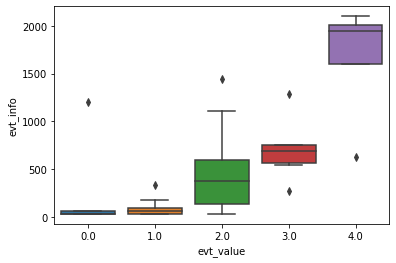

In [134]:
import seaborn as sns

sns.boxplot(data = sleep_states, x = 'evt_value', y = 'evt_info')
plt.show()

## Tải đồng thời nhiều tín hiệu

Method cuối cùng trong class DataImporter mà Nhi muốn giới thiệu, đó là import_multiple_raw_data, cho phép tải đồng thời nhiều kênh tín hiệu thô, và đồng bộ hóa tất cả theo cùng 1 tần số lấy mẫu.

Method này sử dụng multithreading hỗ trợ thi hành nhiều tác vụ song song để tăng tốc độ của quy trình.

In [45]:
help(case.import_multiple_raw_data)

Help on method import_multiple_raw_data in module module1.raw_data_parser:

import_multiple_raw_data(type_list: list, samp_freq: int, n_jobs: int) method of module1.raw_data_parser.DataImporter instance
    Hàm cho phép tải đồng thời nhiều kênh tín hiệu thô từ 1 list, 
    và đồng bộ hóa tất cả theo cùng 1 tần số lấy mẫu
    :type_list: 1 list nhiều tên viết tắt của loại tín hiệu;
    
    Ghi chú: Chỉ áp dụng cho raw data (Loại 1), không áp dụng được cho loại 2A và 2B
    :samp_freq: 1 giá trị tần số lấy mẫu duy nhất, dùng để tái chọn mẫu
    :n_jobs: Số tác vụ thi hành song song (threads)
    
    :return: 1 dictionary với keys là tên loại tín hiệu, 
    value là pd.Series chứa chuỗi tín hiệu tương ứng, đã được tái chọn mẫu,
    có datetime index.



Thí dụ Nhi muốn tải 6 kênh tín hiệu gồm áp suất đai ngực, bụng (tx rip, abd rip), nasal flow thermistance (flow th), chuyển động hàm dưới (hmm), huyết áp tâm thu (sys ap), và áp suất thực quản (oesp), và đồng bộ hóa ở 10 Hz

In [135]:
import time

start = time.perf_counter()

signal_pack = case.import_multiple_raw_data(['tx rip', 'flow th', 'abd rip', 
                                             'hmm', 'sys ap', 'oesp'], 
                                            10, 
                                            n_jobs = 6)

end = time.perf_counter()

print(f'Thi hành mất {round(end - start, 2)} giây')

Khởi động tác vụ song song, tải 6 kênh tín hiệu


Tải và tái chọn mẫu thành công kênh tx rip
Tải và tái chọn mẫu thành công kênh flow th
Tải và tái chọn mẫu thành công kênh abd rip
Tải và tái chọn mẫu thành công kênh hmm
Tải và tái chọn mẫu thành công kênh sys ap
Tải và tái chọn mẫu thành công kênh oesp

Đã tải xong 6 kênh tín hiệu
Thi hành mất 101.59 giây


Trên máy tính của Nhi có 16 threads, quy trình thi hành mất 101 giây. Kết quả lưu trong dictionary signal_pack, và như ta thấy, mỗi chuỗi tín hiệu có độ dài như nhau vì đã được đồng bộ hóa ở 10 Hz.

In [136]:
signal_pack

{'tx rip': 2017-09-30 22:52:18+02:00          -351.0
 2017-09-30 22:52:18.100000+02:00   -670.0
 2017-09-30 22:52:18.200000+02:00   -813.0
 2017-09-30 22:52:18.300000+02:00   -908.0
 2017-09-30 22:52:18.400000+02:00   -946.0
                                     ...  
 2017-10-01 06:19:23.500000+02:00   -111.0
 2017-10-01 06:19:23.600000+02:00    -94.0
 2017-10-01 06:19:23.700000+02:00    -74.0
 2017-10-01 06:19:23.800000+02:00    -50.0
 2017-10-01 06:19:23.900000+02:00    -24.0
 Freq: 100L, Name: tx rip, Length: 268260, dtype: float64,
 'flow th': 2017-09-30 22:52:18+02:00           133.0
 2017-09-30 22:52:18.100000+02:00     48.0
 2017-09-30 22:52:18.200000+02:00    -22.0
 2017-09-30 22:52:18.300000+02:00    -91.0
 2017-09-30 22:52:18.400000+02:00   -160.0
                                     ...  
 2017-10-01 06:19:23.500000+02:00    135.0
 2017-10-01 06:19:23.600000+02:00     55.0
 2017-10-01 06:19:23.700000+02:00     -8.0
 2017-10-01 06:19:23.800000+02:00    -65.0
 2017-10-01 06:19

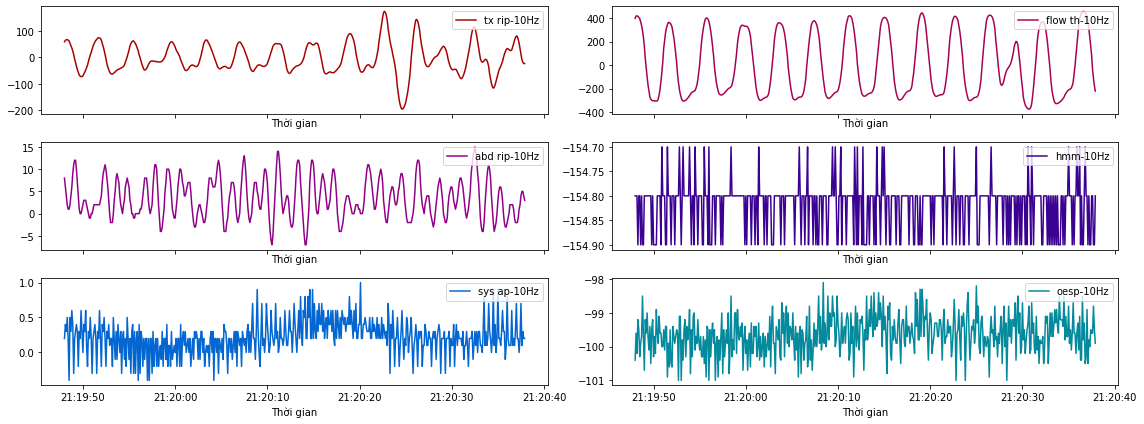

In [170]:
import matplotlib.dates as md

fig, axs = plt.subplots(nrows=3,ncols=2,
                        sharex=True, 
                        sharey=False,
                        figsize=(16,6))

fig.subplots_adjust(hspace=0.2)
colors = ['#a60202','#a60254','#910188','#3b0191','#0467d1','#038a9c']

for i, (ax, color) in enumerate(zip(axs.flatten(), colors)):
    k = list(signal_pack.keys())[i]
    s = list(signal_pack.values())[i][16500:17000]

    ax.plot(s,color = color,label =  f"{k}-10Hz")

    ax.legend(loc = 'upper right')
    xfmt = md.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_xlabel('Thời gian')
plt.tight_layout()
plt.show()

# Tổng kết

Bài thực hành khép lại ở đây, những thông điệp chính trong bài gồm:

1) Nên tổ chức code lập trình cho từng công đoạn trong thí nghiệm bằng packages và module, và sử dụng thiết kế OOP một cách phù hợp.

2) Phân tích tín hiệu sinh học không thực hiện trên dữ liệu dạng bảng truyền thống, nhưng dựa trên dữ liệu chuỗi, với 3 loại thường gặp là chuỗi định lượng liên tục, chuỗi định tính liên tục và danh sách biến cố. Có thể hoán chuyển giữa các loại này.

3) Tuy không trực tiếp tham gia vào phân tích, hệ thống datetime index hay timestamps có vai trò cực kì quan trọng, để đảm bảo tính liên tục và đồng bộ giữa các chuỗi dữ liệu, sự chính xác trong việc chọn mẫu, phân chia, ghép nối hay gắn nhãn cho dữ liệu.

4) Tải dữ liệu và sao lưu là một quy trình Input/Output bound, có thể được tối ưu về hiệu năng bằng cách sử dụng multithreading.

Hẹn gặp các bạn trong bài tiếp theo.